In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/matrix_multiplication_from_fastai_course':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/matrix_multiplication_from_fastai_course')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_122606/3757078943.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

In [2]:
import numpy as np
import torch
from typing import List, Tuple
import matplotlib.pyplot as plt

def matmul(a: List[List[float]], b: List[List[float]]) -> List[List[float]]:
    """Matrix multiplication from scratch"""
    # Check dimensions
    assert len(a[0]) == len(b), "Incompatible dimensions"
    
    # Initialize result matrix
    result = [[0.0 for _ in range(len(b[0]))] for _ in range(len(a))]
    
    # Perform multiplication
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]
    
    return result

# Example matrices
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

# Calculate result
result = matmul(A, B)
print("Result of matrix multiplication:")
print(np.array(result))

Result of matrix multiplication:
[[19. 22.]
 [43. 50.]]


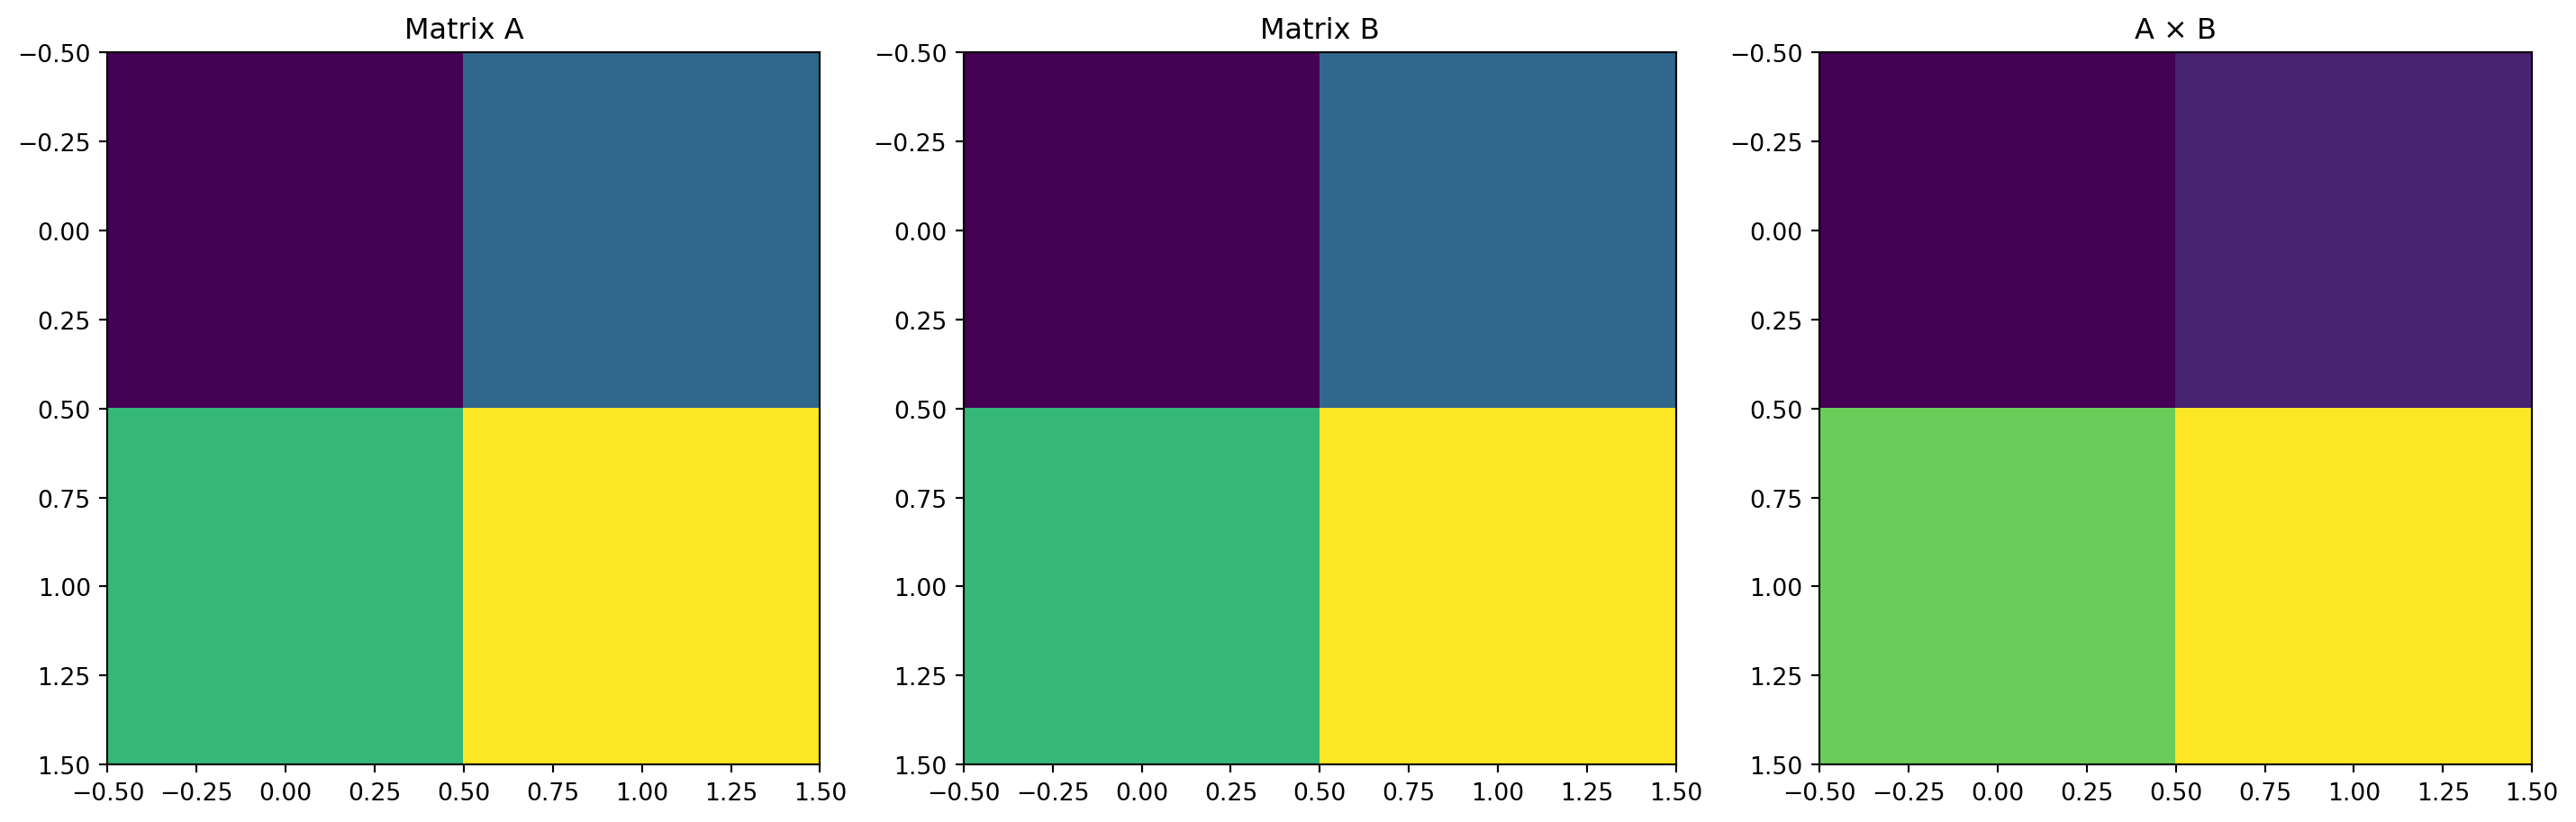

In [3]:
def plot_matrix_mult(A: np.ndarray, B: np.ndarray) -> None:
    """Visualize matrix multiplication process"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot first matrix
    ax1.imshow(A, cmap='viridis')
    ax1.set_title('Matrix A')
    
    # Plot second matrix
    ax2.imshow(B, cmap='viridis')
    ax2.set_title('Matrix B')
    
    # Plot result
    result = np.dot(A, B)
    ax3.imshow(result, cmap='viridis')
    ax3.set_title('A × B')
    
    plt.tight_layout()
    plt.show()

# Create example matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

plot_matrix_mult(A, B)

In [4]:
# Convert to PyTorch tensors
A_torch = torch.tensor(A, dtype=torch.float32)
B_torch = torch.tensor(B, dtype=torch.float32)

# PyTorch matrix multiplication
result_torch = torch.matmul(A_torch, B_torch)
print("PyTorch result:")
print(result_torch)

PyTorch result:
tensor([[19., 22.],
        [43., 50.]])


In [5]:
import time

def benchmark_matmul(size: int = 100) -> None:
    """Compare performance of different implementations"""
    # Generate random matrices
    A = np.random.randn(size, size)
    B = np.random.randn(size, size)
    
    # Custom implementation
    start = time.time()
    _ = matmul(A.tolist(), B.tolist())
    custom_time = time.time() - start
    
    # NumPy
    start = time.time()
    _ = np.dot(A, B)
    numpy_time = time.time() - start
    
    # PyTorch
    A_torch = torch.tensor(A)
    B_torch = torch.tensor(B)
    start = time.time()
    _ = torch.matmul(A_torch, B_torch)
    torch_time = time.time() - start
    
    print(f"Custom implementation: {custom_time:.4f}s")
    print(f"NumPy: {numpy_time:.4f}s")
    print(f"PyTorch: {torch_time:.4f}s")

benchmark_matmul()

Custom implementation: 0.0618s
NumPy: 0.0094s
PyTorch: 0.0001s
